In [1]:
import sympy as sp

In [2]:
x1, x2 = sp.symbols('x1 x2')
f = (x1**2 + x2**2 - 1)**2 + (x2**2 - 1)**2
f_grad = [f.diff(x1), f.diff(x2)]
f_hess = [[f_grad[0].diff(x1), f_grad[0].diff(x2)], [f_grad[1].diff(x1), f_grad[1].diff(x2)]]

In [26]:
sp.pprint(sp.Matrix(f_hess))

⎡     2       2                        ⎤
⎢12⋅x₁  + 4⋅x₂  - 4       8⋅x₁⋅x₂      ⎥
⎢                                      ⎥
⎢                        2        2    ⎥
⎣     8⋅x₁⋅x₂        4⋅x₁  + 24⋅x₂  - 8⎦


Calculo de los puntos criticos

In [6]:
sols = sp.solve(f_grad, [x1, x2])
for sol in sols:
    print(sol)

(-1, 0)
(0, -1)
(0, 0)
(0, 1)
(1, 0)


Clasificacion de los puntos criticos

In [16]:
def hessian_at(hess, sol):
    H = sp.Matrix([[hess[0,0].subs({x1: sol[0], x2: sol[1]}), hess[0,1].subs({x1: sol[0], x2: sol[1]})],
                   [hess[1,0].subs({x1: sol[0], x2: sol[1]}), hess[1,1].subs({x1: sol[0], x2: sol[1]})]])
    return sp.simplify(H)

In [22]:
for sol in sols:
    H = hessian_at(sp.Matrix(f_hess), sol)
    eigenvals = H.eigenvals()
    print(f'(x1, x2) = {sol}')
    sp.pprint(H)
    print(f'Eigenvalores: {eigenvals.keys()}\n')

(x1, x2) = (-1, 0)
⎡8  0 ⎤
⎢     ⎥
⎣0  -4⎦
Eigenvalores: dict_keys([8, -4])

(x1, x2) = (0, -1)
⎡0  0 ⎤
⎢     ⎥
⎣0  16⎦
Eigenvalores: dict_keys([0, 16])

(x1, x2) = (0, 0)
⎡-4  0 ⎤
⎢      ⎥
⎣0   -8⎦
Eigenvalores: dict_keys([-4, -8])

(x1, x2) = (0, 1)
⎡0  0 ⎤
⎢     ⎥
⎣0  16⎦
Eigenvalores: dict_keys([0, 16])

(x1, x2) = (1, 0)
⎡8  0 ⎤
⎢     ⎥
⎣0  -4⎦
Eigenvalores: dict_keys([8, -4])



In [29]:
sols

[(-1, 0), (0, -1), (0, 0), (0, 1), (1, 0)]

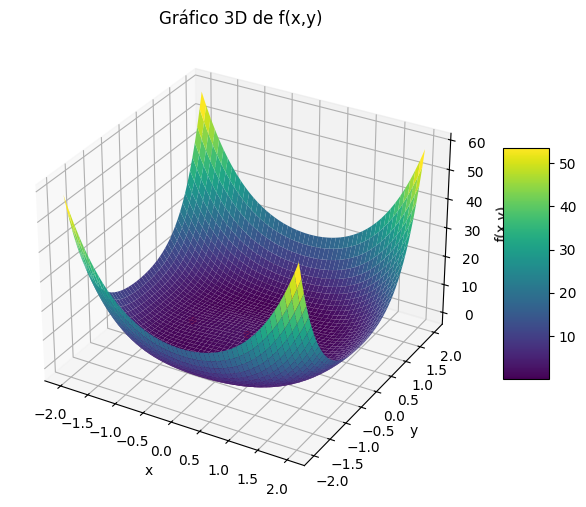

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el rango de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Definir la función f(x,y) = (x^2 + y^2 - 1)^2 + (y^2 - 1)^2
Z = (X**2 + Y**2 - 1)**2 + (Y**2 - 1)**2

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
points = ax.scatter([sol[0] for sol in sols], [sol[1] for sol in sols], [f.subs({x1: sol[0], x2: sol[1]}) for sol in sols], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gráfico 3D de f(x,y)')

# Agregar una barra de colores para indicar la escala de valores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


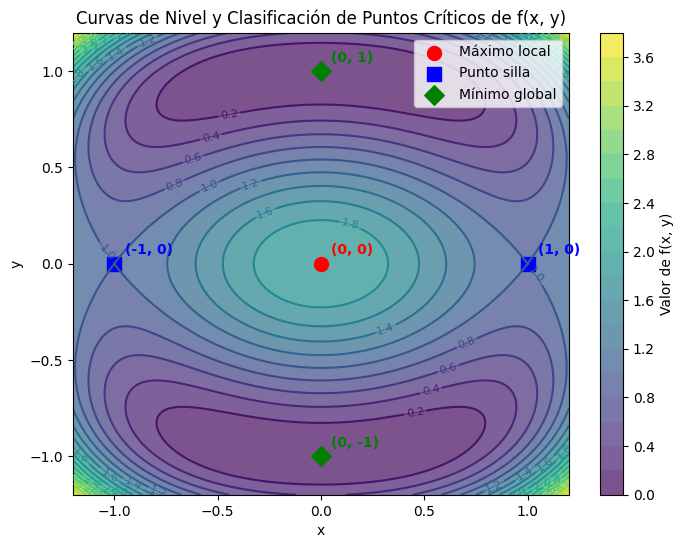

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de forma vectorizada para numpy
def f_np(x, y):
    return (x**2 + y**2 - 1)**2 + (y**2 - 1)**2

# Crear una malla de puntos en el plano
lims = 1.2
x = np.linspace(-lims, lims, 400)
y = np.linspace(-lims, lims, 400)
X, Y = np.meshgrid(x, y)
Z = f_np(X, Y)

# Crear la figura y eje para el contorno
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim([-lims,lims])
ax.set_ylim([-lims,lims])
contours = ax.contour(X, Y, Z, levels=20, cmap='viridis')
contours_filled = ax.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)
cbar = plt.colorbar(contours_filled)
cbar.set_label('Valor de f(x, y)')

# Puntos críticos y su clasificación:
# - (0, 0): f(0,0)=2, se clasifica como máximo local.
# - (1, 0) y (-1, 0): f(1,0)=f(-1,0)=1, se clasifican como puntos silla.
# - (0, 1) y (0, -1): f(0,1)=f(0,-1)=0, son mínimos globales.
puntos_criticos = {
    "Máximo local": [(0, 0)],
    "Punto silla": [(1, 0), (-1, 0)],
    "Mínimo global": [(0, 1), (0, -1)]
}

# Asignar diferentes símbolos y colores a cada tipo de punto
marcadores = {"Máximo local": "o", "Punto silla": "s", "Mínimo global": "D"}
colores = {"Máximo local": "red", "Punto silla": "blue", "Mínimo global": "green"}

# Graficar, etiquetar y anotar los puntos críticos
for etiqueta, lista_puntos in puntos_criticos.items():
    pts = np.array(lista_puntos)
    ax.scatter(pts[:, 0], pts[:, 1],
               marker=marcadores[etiqueta],
               color=colores[etiqueta],
               s=100,
               label=etiqueta)
    # Anotar las coordenadas de cada punto
    for (xi, yi) in lista_puntos:
        ax.text(xi + 0.05, yi + 0.05, f"({xi}, {yi})",
                color=colores[etiqueta],
                fontsize=10, fontweight='bold')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Curvas de Nivel y Clasificación de Puntos Críticos de f(x, y)')

plt.show()


In [1]:
import sympy as sp